<a href="https://colab.research.google.com/github/Aryan95614/Pytorch-Lessons/blob/RUNTHISFILE/Pytorch_Tutorial_4_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Where does computer vision get used?
If you use a smartphone, you've already used computer vision.

Camera and photo apps use computer vision to enhance and sort images.

Modern cars use computer vision to avoid other cars and stay within lane lines.

Manufacturers use computer vision to identify defects in various products.

Security cameras use computer vision to detect potential intruders.

In essence, anything that can described in a visual sense can be a potential computer vision problem.

This is what we are going to cover:
<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th><strong>Topic</strong></th>
<th><strong>Contents</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>0. Computer vision libraries in PyTorch</strong></td>
<td>PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.</td>
</tr>
<tr>
<td><strong>1. Load data</strong></td>
<td>To practice computer vision, we'll start with some images of different pieces of clothing from <a href="https://github.com/zalandoresearch/fashion-mnist">FashionMNIST</a>.</td>
</tr>
<tr>
<td><strong>2. Prepare data</strong></td>
<td>We've got some images, let's load them in with a <a href="https://pytorch.org/docs/stable/data.html">PyTorch <code>DataLoader</code></a> so we can use them with our training loop.</td>
</tr>
<tr>
<td><strong>3. Model 0: Building a baseline model</strong></td>
<td>Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a <strong>loss function</strong>, <strong>optimizer</strong> and build a <strong>training loop</strong>.</td>
</tr>
<tr>
<td><strong>4. Making predictions and evaluting model 0</strong></td>
<td>Let's make some predictions with our baseline model and evaluate them.</td>
</tr>
<tr>
<td><strong>5. Setup device agnostic code for future models</strong></td>
<td>It's best practice to write device-agnostic code, so let's set it up.</td>
</tr>
<tr>
<td><strong>6. Model 1: Adding non-linearity</strong></td>
<td>Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers.</td>
</tr>
<tr>
<td><strong>7. Model 2: Convolutional Neural Network (CNN)</strong></td>
<td>Time to get computer vision specific and introduce the powerful convolutional neural network architecture.</td>
</tr>
<tr>
<td><strong>8. Comparing our models</strong></td>
<td>We've built three different models, let's compare them.</td>
</tr>
<tr>
<td><strong>9. Evaluating our best model</strong></td>
<td>Let's make some predictons on random images and evaluate our best model.</td>
</tr>
<tr>
<td><strong>10. Making a confusion matrix</strong></td>
<td>A confusion matrix is a great way to evaluate a classification model, let's see how we can make one.</td>
</tr>
<tr>
<td><strong>11. Saving and loading the best performing model</strong></td>
<td>Since we might want to use our model for later, let's save it and make sure it loads back in correctly.</td>
</tr>
</tbody>
</table></div></div>

##1. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th>PyTorch module</th>
<th>What does it do?</th>
</tr>
</thead>
<tbody>
<tr>
<td><a href="https://pytorch.org/vision/stable/index.html"><code>torchvision</code></a></td>
<td>Contains datasets, model architectures and image transformations often used for computer vision problems.</td>
</tr>
<tr>
<td><a href="https://pytorch.org/vision/stable/datasets.html"><code>torchvision.datasets</code></a></td>
<td>Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains <a href="https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets">a series of base classes for making custom datasets</a>.</td>
</tr>
<tr>
<td><a href="https://pytorch.org/vision/stable/models.html"><code>torchvision.models</code></a></td>
<td>This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems.</td>
</tr>
<tr>
<td><a href="https://pytorch.org/vision/stable/transforms.html"><code>torchvision.transforms</code></a></td>
<td>Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here.</td>
</tr>
<tr>
<td><a href="https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset"><code>torch.utils.data.Dataset</code></a></td>
<td>Base dataset class for PyTorch.</td>
</tr>
<tr>
<td><a href="https://pytorch.org/docs/stable/data.html#module-torch.utils.data"><code>torch.utils.data.DataLoader</code></a></td>
<td>Creates a Python iteralbe over a dataset (created with <code>torch.utils.data.Dataset</code>).</td>
</tr>
</tbody>
</table></div></div>

Note: The torch.utils.data.Dataset and torch.utils.data.DataLoader classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 1.13.0+cu116
torchvision version: 0.14.0+cu116


torchvision.datasets contains a lot of example datasets you can use to practice writing computer vision code on. FashionMNIST is one of those datasets. And since it has 10 different image classes (different types of clothing), it's a multi-class classification problem.

Later, we'll be building a computer vision neural network to identify the different styles of clothing in these images.

PyTorch has a bunch of common computer vision datasets stored in torchvision.datasets.

Including FashionMNIST in torchvision.datasets.FashionMNIST().

To download it, we provide the following parameters:

- root: str - which folder do you want to download the data to?
- train: Bool - do you want the training or test split?
- download: Bool - should the data be downloaded?
- transform: torchvision.transforms - what transformations would you like to do on the data?
- target_transform - you can transform the targets (labels) if you like too.

Many other datasets in torchvision have these parameter options.

##1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The original MNIST dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

FashionMNIST, made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

<img  src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-computer-vision-input-and-output-shapes.png" />

If color_channels=3, the image comes in pixel values for red, green and blue (this is also known a the RGB color model).

The order of our current tensor is often referred to as CHW (Color Channels, Height, Width).

There's debate on whether images should be represented as CHW (color channels first) or HWC (color channels last).

PyTorch generally accepts NCHW (channels first) as the default for many operators.

However, PyTorch also explains that NHWC (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [ ]:
# How many samples are there? 
print(len(train_data.data))
print(len(train_data.targets))
print(len(test_data.data))
print(len(test_data.targets))

60000
60000
10000
10000


In [ ]:
# See classes
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Sweet! It looks like we're dealing with 10 different kinds of clothes.

Because we're working with 10 different classes, it means our problem is multi-class classification.

Let's get visual.

###1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


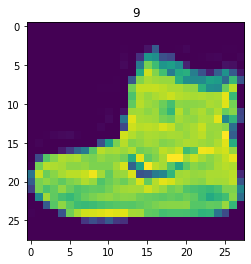

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0] # first example
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);


We can turn the image into grayscale using the cmap parameter of plt.imshow().

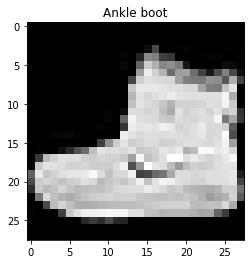

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

Hmmm, this dataset doesn't look too aesthetic.

But the principles we're going to learn on how to build a model for it will be similar across a wide range of computer vision problems.

In essence, taking pixel values and building a model to find patterns in them to use on future pixel values.

Plus, even for this small dataset (yes, even 60,000 images in deep learning is considered quite small), could you write a program to classify each one of them?

You probably could.

But I think coding a model in PyTorch would be faster.

##2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a torch.utils.data.DataLoader or DataLoader for short.

The DataLoader does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks.

These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

32 is a good place to start for a fair amount of problems.

But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).

<img src= "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-batching-fashionmnist.png">




In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f1308453340>, <torch.utils.data.dataloader.DataLoader object at 0x7f1308453580>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(train_features_batch.shape)
print(train_labels_batch.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


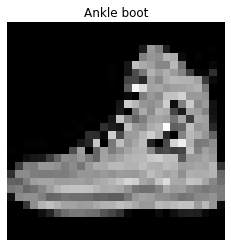

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

##3. Model 0: Build a baseline model

Data loaded and prepared!

Time to build a baseline model by subclassing nn.Module.

A baseline model is one of the simplest models you can imagine.

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

Our baseline will consist of two nn.Linear() layers.

We've done this in a previous section but there's going to one slight difference.

Because we're working with image data, we're going to use a different layer to start things off.

And that's the nn.Flatten() layer.

nn.Flatten() compresses the dimensions of a tensor into a single vector.

This is easier to understand when you see it.

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FirstModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

Wonderful!

We've got a baseline model class we can use, now let's instantiate a model.

We'll need to set the following parameters:

- input_shape=784 - this is how many features you've got going in the model, in our case, it's one for every pixel in the target image (28 pixels high by 28 pixels wide = 784 features).
- hidden_units=10 - number of units/neurons in the hidden layer(s), this number could be whatever you want but to keep the model small we'll start with 10.
- output_shape=len(class_names) - since we're working with a multi-class classification problem, we need an output neuron per class in our dataset.

Let's create an instance of our model and send to the CPU for now (we'll run a small test for running model_0 on CPU vs. a similar model on GPU soon).

In [ ]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FirstModel(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FirstModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

###3.1 Setup loss, optimizer and evaluation metrics

Since we're working on a classification problem, let's bring in our helper_functions.py script and subsequently the accuracy_fn() we defined in notebook 02.

Note: Rather than importing and using our own accuracy function or evaluation metric(s), you could import various evaluation metrics from the TorchMetrics package.

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

helper_functions.py already exists, skipping download


###3.2 Creating a function to time our experiments

Loss function and optimizer ready!

It's time to start training a model.

But how about we do a little experiment while we train.

I mean, let's make a timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

Our timing function will import the timeit.default_timer() function from the Python timeit module.

In [ ]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

###3.3 Creating a training loop and training a model on batches of data
Beautiful!

Looks like we've got all of the pieces of the puzzle ready to go, a timer, a loss function, an optimizer, a model and most importantly, some data.

Let's now create a training loop and a testing loop to train and evaluate our model.

We'll be using the same steps as the previous notebook(s), though since our data is now in batch form, we'll add another loop to loop through our data batches.

Our data batches are contained within our DataLoaders, train_dataloader and test_dataloader for the training and test data splits respectively.

A batch is BATCH_SIZE samples of X (features) and y (labels), since we're using BATCH_SIZE=32, our batches have 32 samples of images and targets.

And since we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.

This means we'll have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.

Let's step through it:

Loop through epochs.
Loop through training batches, perform training steps, calculate the train loss per batch.
Loop through testing batches, perform testing steps, calculate the test loss per batch.
Print out what's happening.
Time it all (for fun).
A fair few steps but...

...if in doubt, code it out.

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 26.000 seconds


##4. Make predictions and get Model 0 results

Since we're going to be building a few models, it's a good idea to write some code to evaluate them all in similar ways.

Namely, let's create a function that takes in a trained model, a DataLoader, a loss function and an accuracy function.

The function will use the model to make predictions on the data in the DataLoader and then we can evaluate those predictions using the loss function and accuracy function.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)


##5. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02.

Seeing the data we've been working with, do you think it needs non-linear functions?

And remember, linear means straight and non-linear means non-straight.

Let's find out.

We'll do so by recreating a similar model to before, except this time we'll put non-linear functions (nn.ReLU()) in between each linear layer.

In [ ]:
# Create a model with non-linear and linear layers
class Model2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

That looks good.

Now let's instantiate it with the same settings we used before.

We'll need input_shape=784 (equal to the number of features of our image data), hidden_units=10 (starting small and the same as our baseline model) and output_shape=len(class_names) (one output unit per class).

Note: Notice how we kept most of the settings of our model the same except for one change: adding non-linear layers. This is a standard practice for running a series of machine learning experiments, change one thing and see what happens, then do it again, again, again.

In [ ]:
torch.manual_seed(42)
model_1 = Model2(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
)

###5.1 Setup loss, optimizer and evaluation metrics

As usual, we'll setup a loss function, an optimizer and an evaluation metric (we could do multiple evaluation metrics but we'll stick with accuracy for now).

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss() # for multi-classification
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

###5.2 Functionizing training and test loops

So far we've been writing train and test loops over and over.

Let's write them again but this time we'll put them in functions so they can be called again and again.

And because we're using device-agnostic code now, we'll be sure to call .to(device) on our feature (X) and target (y) tensors.

For the training loop we'll create a function called train_step() which takes in a model, a DataLoader a loss function and an optimizer.

The testing loop will be similar but it'll be called test_step() and it'll take in a model, a DataLoader, a loss function and an evaluation function.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
              device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


Woohoo!

Now we've got some functions for training and testing our model, let's run them.

We'll do so inside another loop for each epoch.

That way for each epoch we're going a training and a testing step.

Note: You can customize how often you do a testing step. Sometimes people do them every five epochs or 10 epochs or in our case, every epoch.

Let's also time things to see how long our code takes to run on the GPU.

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 25.751 seconds


There's a small bottleneck between copying data from the CPU memory (default) to the GPU memory.

So for smaller models and datasets, the CPU might actually be the optimal place to compute on.

But for larger datasets and models, the speed of computing the GPU can offer usually far outweighs the cost of getting the data there.

However, this is largely dependant on the hardware you're using. With practice, you will get used to where the best place to train your models is.

In [ ]:
torch.manual_seed(42)

# Note: This will error due to `eval_model()` not using device agnostic code 
model_1_results = eval_model(model=model_1, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 
print(model_1_results)

{'model_name': 'Model2',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)

print(model_0_results)
print(model_1_results)

{'model_name': 'FirstModel', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}
{'model_name': 'Model2', 'model_loss': 0.6850009560585022, 'model_acc': 75.01996805111821}


Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main to fix overfitting include:

Using a smaller or different model (some models fit certain kinds of data better than others).
Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).
There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number 1: using a different model.


##6. Model 2: Building a Convolutional Neural Network (CNN)
Alright, time to step things up a notch.


It's time to create a Convolutional Neural Network (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

It follows the typical structure of a convolutional neural network:

- Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, depending on requirements.

<div class="md-typeset__scrollwrap"><div class="md-typeset__table"><table>
<thead><tr>
<th><strong>Problem type</strong></th>
<th><strong>Model to use (generally)</strong></th>
<th><strong>Code example</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>Structured data (Excel spreadsheets, row and column data)</td>
<td>Gradient boosted models, Random Forests, XGBoost</td>
<td><a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble"><code>sklearn.ensemble</code></a>, <a href="https://xgboost.readthedocs.io/en/stable/">XGBoost library</a></td>
</tr>
<tr>
<td>Unstructured data (images, audio, language)</td>
<td>Convolutional Neural Networks, Transformers</td>
<td><a href="https://pytorch.org/vision/stable/models.html"><code>torchvision.models</code></a>, <a href="https://huggingface.co/docs/transformers/index">HuggingFace Transformers</a></td>
</tr>
</tbody>
</table></div></div>

To do so, we'll leverage the nn.Conv2d() and nn.MaxPool2d() layers from torch.nn.

In [ ]:
# Create a convolutional neural network 
class Model3(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = Model3(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
print(model_2)

Model3(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


##6.1 Stepping through nn.Conv2d()

We could start using our model above and see what happens but let's first step through the two new layers we've added:

nn.Conv2d(), also known as a convolutional layer.
nn.MaxPool2d(), also known as a max pooling layer.
Question: What does the "2d" in nn.Conv2d() stand for?

The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width. Yes, there's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.

For other dimensional data (such as 1D for text or 3D for 3D objects) there's also nn.Conv1d() and nn.Conv3d().

To test the layers out, let's create some toy data just like the data used on CNN Explainer.

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

Let's create an example nn.Conv2d() with various parameters:

- in_channels (int) - Number of channels in the input image.
- out_channels (int) - Number of channels produced by the convolution.
kernel_size (int or tuple) - Size of the convolving kernel/filter.
stride (int or tuple, optional) 
- How big of a step the convolving kernel takes at a time. Default: 1.
padding (int, tuple, str) 
- Padding added to all four sides of input. Default: 0.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif" alt="example of going through the different parameters of a Conv2d layer">

If we try to pass a single image in, we get a shape mismatch error:



Note: If you're running PyTorch 1.11.0+, this error won't occur.

This is because our nn.Conv2d() layer expects a 4-dimensional tensor as input with size (N, C, H, W) or [batch_size, color_channels, height, width].

Right now our single image test_image only has a shape of [color_channels, height, width] or [3, 64, 64].

We can fix this for a single image using test_image.unsqueeze(dim=0) to add an extra dimension for N.

In [ ]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

In [ ]:
# Add extra dimension to test image
test_image.unsqueeze(dim=0).shape
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [ ]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

Look at that! A bunch of random numbers for a weight and bias tensor.

The shapes of these are manipulated by the inputs we passed to nn.Conv2d() when we set it up.

Let's check them out.

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


###6.2 Stepping through nn.MaxPool2d()

Now let's check out what happens when we move data through nn.MaxPool2d().

In [ ]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a nn.MaxPool2d() layer.

The kernel_size of the nn.MaxPool2d() layer will effects the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similiar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Notice the final two dimensions between random_tensor and max_pool_tensor, they go from [2, 2] to [1, 1].

In essence, they get halved.

And the change would be different for different values of kernel_size for nn.MaxPool2d().

Also notice the value leftover in max_pool_tensor is the maximum value from random_tensor.

What's happening here?

This is another important piece of the puzzle of neural networks.

Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png"/>

This means, that from the point of view of a neural network, intelligence is compression.

This is the idea of the use of a nn.MaxPool2d() layer: take the maximum value from a portion of a tensor and disregard the rest.

In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.

It is the same story for a nn.Conv2d() layer.

Except instead of just taking the maximum, the nn.Conv2d() performs a conovlutional operation on the data (see this in action on the CNN Explainer webpage).

Exercise: What do you think the nn.AvgPool2d() layer does? Try making a random tensor like we did above and passing it through. Check the input and output shapes as well as the input and output values.

Extra-curriculum: Lookup "most common convolutional neural networks", what architectures do you find? Are any of them contained within the torchvision.models library? What do you think you could do with these?

###6.3 Setup a loss function and optimizer for model_2

We've stepped through the layers in our first CNN enough.

But remember, if something still isn't clear, try starting small.

Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup a loss function and an optimizer.

We'll use the functions as before, nn.CrossEntropyLoss() as the loss function (since we're working with multi-class classification data).

And torch.optim.SGD() as the optimizer to optimize model_2.parameters() with a learning rate of 0.1.

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.1)


###6.4 Training and testing model_2 using our training and test functions

Loss and optimizer ready!

Time to train and test.

We'll use our train_step() and test_step() functions we created before.

We'll also measure the time to compare it to our other models.

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.36184 | Train accuracy: 86.87%
Test loss: 0.35975 | Test accuracy: 86.75%

Epoch: 1
---------
Train loss: 0.32664 | Train accuracy: 88.12%
Test loss: 0.33187 | Test accuracy: 87.73%

Epoch: 2
---------
Train loss: 0.30604 | Train accuracy: 88.92%
Test loss: 0.31678 | Test accuracy: 88.45%

Train time on cpu: 171.037 seconds


In [ ]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'Model3',
 'model_loss': 0.3167797029018402,
 'model_acc': 88.44848242811501}

8. Compare model results and training time
We've trained three different models.

- model_0 - our baseline model with two nn.Linear() layers.
model_1 - the same setup as our baseline model except with nn.ReLU() layers in between the nn.Linear() layers.
- model_2 - our first CNN model that mimics the TinyVGG architecture on the CNN Explainer website.

This is a regular practice in machine learning.

Building multiple models and performing multiple training experiments to see which performs best.

Let's combine our model results dictionaries into a DataFrame and find out.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FirstModel,0.476639,83.426518
1,Model2,0.685001,75.019968
2,Model3,0.316780,88.448482
